In [5]:
import pandas as pd # Librería para manekar los datos
import numpy as np # Librería para realizar los calculos numéricos
import matplotlib.pyplot as plt # Librería para graficar
from sklearn.model_selection import train_test_split # Libreria para dividir datos de prueba y entrenamiento
from sklearn.model_selection import GridSearchCV # Librería para la busqueda de hiperparámetros
from sklearn.tree import DecisionTreeClassifier, plot_tree # Modelo del Árbol de Decisión
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc # Métricas para evaluar el modelo

In [6]:
datos = pd.read_csv("D:/DocumentsD/ecbd/2daevaluacion/data/breast-cancer.csv") # Cargar los datos del dataset

datos["diagnosis"] = datos["diagnosis"].map({"M": 1, "B": 0}) # Convertir diagnosis: M = 1 (maligno), B = 0 (benigno)

X = datos.drop("diagnosis", axis=1) # Variable Independiente
y = datos["diagnosis"] # Variable Dependiente

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Dividir los datos en entrenamiento y prueba

In [8]:
modelo = DecisionTreeClassifier(random_state=42) # Crear el modelo del Árbol de Decisión
modelo.fit(X_train, y_train) # Entrenamiento del modelo

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_pred = modelo.predict(X_test) # Realizamos las predicción del modelo

In [10]:
result = modelo.score(X_test, y_test)

In [11]:
print("\nResultados de Modelo Base!")
print(f"Score del modelo base: {result}")
print("Exactitud:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Resultados de Modelo Base!
Score del modelo base: 0.9370629370629371
Exactitud: 0.9370629370629371
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        90
           1       0.96      0.87      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [12]:
# Opciones que se probarán en el modelo
parametros = {
    "criterion": ["gini", "entropy"],  # Criterio para medir impureza
    "max_depth": [2, 4, 6, 8, 10, None],  # Tamaño máximo del árbol
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4]  # Mínimo de muestras por hoja
}

# GridSearchCV probará todas las combinaciones
busqueda = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=parametros,
    cv=5,  # Validación cruzada en 5 partes
    scoring="accuracy",  # Métrica a optimizar
    n_jobs=-1  # Usar todos los núcleos disponibles
)

busqueda.fit(X_train, y_train)  # Realizar la búsqueda
print("\nHiperparámetros óptimos encontrados")
print(f"Los hiperparámetros son: {busqueda.best_params_}")  # Mostrar mejores parámetros


Hiperparámetros óptimos encontrados
Los hiperparámetros son: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [13]:
mejor_modelo = busqueda.best_estimator_ # Entrenar el modelo final con los mejores parámetros

y_pred_opt = mejor_modelo.predict(X_test)  # Nuevas predicciones

print("\nResultados del Modelo Optimizado")
print(f"Score del modelo optimizado: {mejor_modelo.score(X_test, y_pred_opt)}")
print("Exactitud:", accuracy_score(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))


Resultados del Modelo Optimizado
Score del modelo optimizado: 1.0
Exactitud: 0.9370629370629371
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        90
           1       0.96      0.87      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [14]:
matriz = confusion_matrix(y_test, y_pred_opt)  # Crear la matriz de confusión

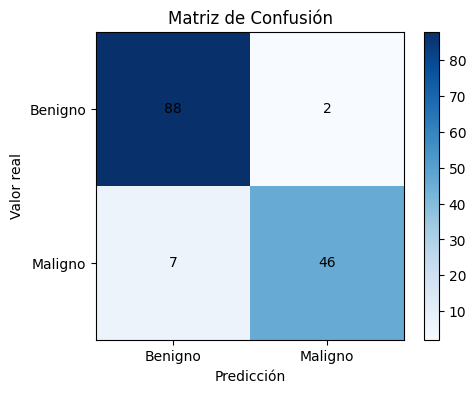

In [15]:
plt.figure(figsize=(5, 4))
plt.imshow(matriz, cmap="Blues")
plt.title("Matriz de Confusión")
plt.colorbar()

# Etiquetas de ejes
plt.xticks([0, 1], ["Benigno", "Maligno"])
plt.yticks([0, 1], ["Benigno", "Maligno"])

# Mostrar los valores dentro de la matriz
for i in range(2):
    for j in range(2):
        plt.text(j, i, matriz[i, j], ha="center", va="center", color="black")

plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

In [16]:
# Curva de ROC - Probabilidad de que la clase sea 1 (maligno)
y_prob = mejor_modelo.predict_proba(X_test)[:, 1]

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_prob) # Calcular puntos de la curva ROC
roc_auc = auc(fpr, tpr)  # Calcular el AUC

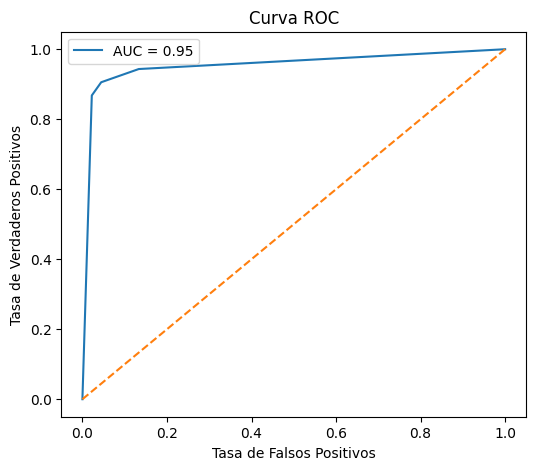

In [18]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # Línea diagonal de referencia
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()

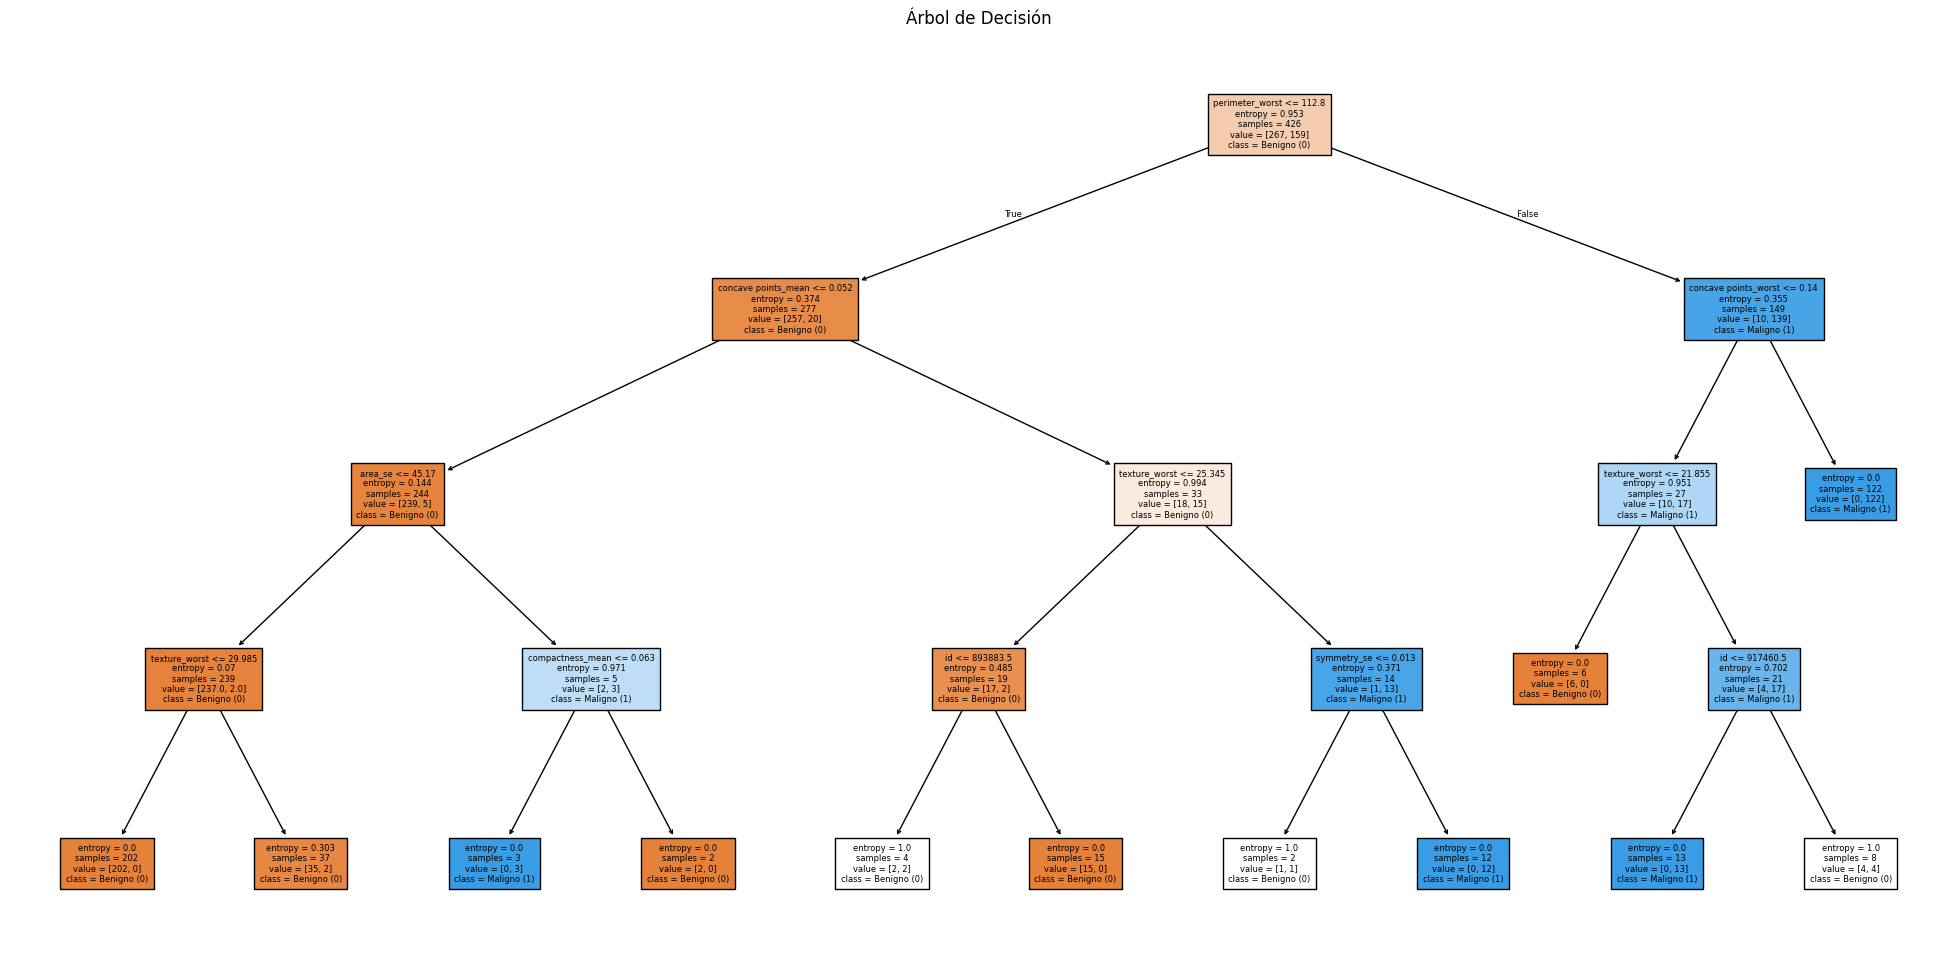

In [19]:
# Graficar el Árbol de Decisión
plt.figure(figsize=(25, 12))  # Ajustar tamaño
plot_tree(
    mejor_modelo,
    feature_names=X.columns,  # Nombres de las columnas
    class_names=["Benigno (0)", "Maligno (1)"],  # Etiquetas de clases
    filled=True,  # Colorear nodos
    fontsize=6  # Tamaño del texto
)
plt.title("Árbol de Decisión")
plt.show()